from https://tigercosmos.xyz/post/2020/04/cv/hybrid-image/

C:\Users\112033645\AppData\Local\Temp\ipykernel_6200\378726032.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(r"F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg", mode='F')
C:\Users\112033645\AppData\Local\Temp\ipykernel_6200\378726032.py:40: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(r"F:\Code\Digtal-Image-Processing\Code\Resources\Data\cat.jpg", mode='F')


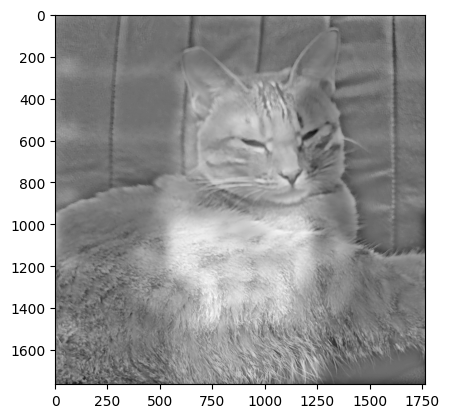

In [3]:
import numpy
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import math
import imageio
import matplotlib.pyplot as plt
from skimage.transform import resize


def makeGaussianFilter(n_row, n_col, sigma, highPass=True):

    center_x = int(n_row/2) + 1 if n_row % 2 == 1 else int(n_row/2)
    center_y = int(n_col/2) + 1 if n_col % 2 == 1 else int(n_col/2)

    def gaussian(i, j):
        coefficient = math.exp(-1.0 * ((i - center_x) **
                                       2 + (j - center_y)**2) / (2 * sigma**2))
        return 1 - coefficient if highPass else coefficient

    return numpy.array([[gaussian(i, j) for j in range(n_col)] for i in range(n_row)])


def filter(image, sigma, isHigh):
    shiftedDFT = fftshift(fft2(image))
    filteredDFT = shiftedDFT * \
        makeGaussianFilter(
            image.shape[0], image.shape[1], sigma, highPass=isHigh)
    res = ifft2(ifftshift(filteredDFT))

    return numpy.real(res)


def hybrid_img(high_img, low_img, sigma_h, sigma_l):
    res = filter(high_img, sigma_h, isHigh=True) + \
        filter(low_img, sigma_l, isHigh=False)
    return res


# 修改這裡的 imageio.imread 參數，使用 mode='F' 來取代 as_gray=True
img1 = imageio.imread(r"F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg", mode='F')
img2 = imageio.imread(r"F:\Code\Digtal-Image-Processing\Code\Resources\Data\cat.jpg", mode='F')
img2 = resize(img2, (img1.shape[0], img1.shape[1])) # 兩張圖要一樣大

plt.imshow(hybrid_img(img1, img2, 10, 10), cmap='gray')
plt.show()
